In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [ ]:
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (13,9)
plt.rcParams['font.size'] = 20
warnings.filterwarnings('ignore')

In [ ]:
multi_data = pd.read_csv('classData.csv')

In [ ]:
multi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7861 entries, 0 to 7860
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   G       7861 non-null   int64  
 1   C       7861 non-null   int64  
 2   B       7861 non-null   int64  
 3   A       7861 non-null   int64  
 4   Ia      7861 non-null   float64
 5   Ib      7861 non-null   float64
 6   Ic      7861 non-null   float64
 7   Va      7861 non-null   float64
 8   Vb      7861 non-null   float64
 9   Vc      7861 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 614.3 KB


In [ ]:
multi_data.head()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983


In [ ]:
any(multi_data.isna().sum() > 0)

False

In [ ]:
print(f'Number of Samples: {multi_data.shape[0]}\nNumber of Features: {multi_data.shape[1]}')

Number of Samples: 7861
Number of Features: 10


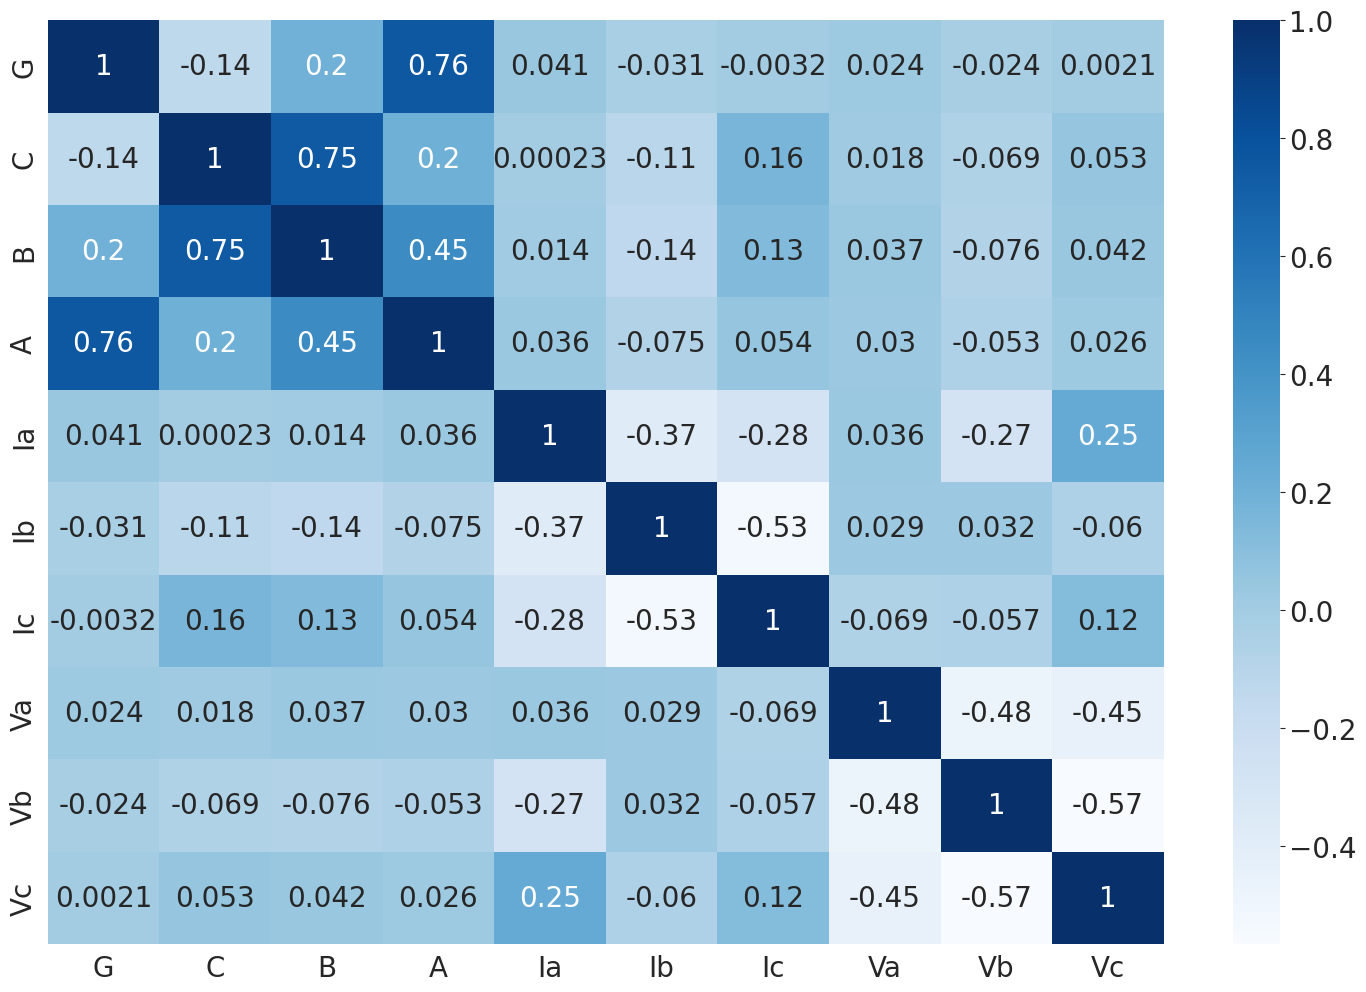

In [ ]:
plt.figure(figsize=(18,12))
sns.heatmap(multi_data.corr(), annot=True, cmap='Blues')
plt.show()

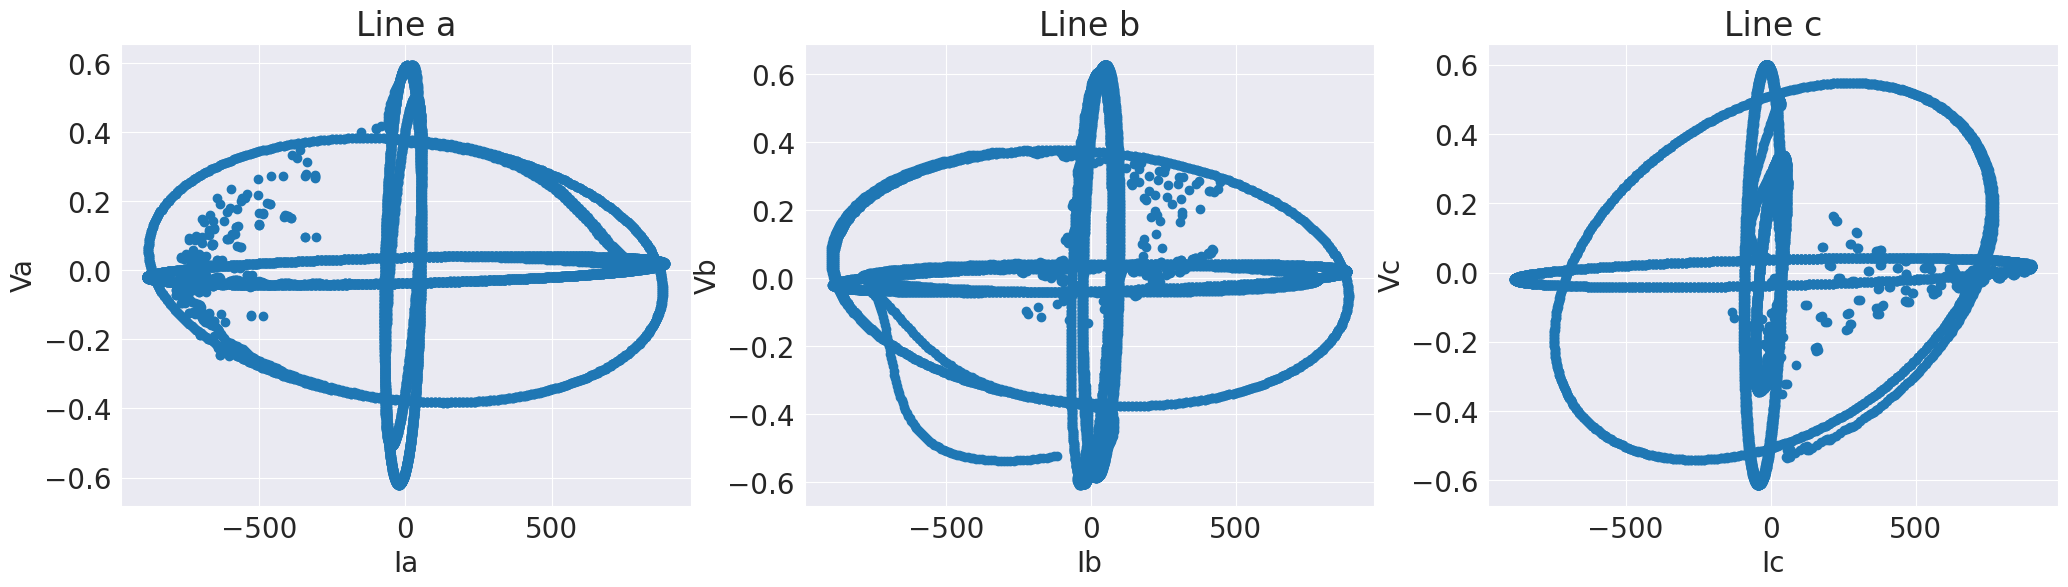

In [ ]:
plt.figure(figsize=(25,6))

a1 = plt.subplot2grid((1,3),(0,0))
a1.scatter(multi_data['Ia'], multi_data['Va'])
a1.set_title('Line a')
a1.set_xlabel('Ia')
a1.set_ylabel('Va')

a2 = plt.subplot2grid((1,3),(0,1))
a2.scatter(multi_data['Ib'], multi_data['Vb'])
a2.set_title('Line b')
a2.set_xlabel('Ib')
a2.set_ylabel('Vb')

a3 = plt.subplot2grid((1,3),(0,2))
a3.scatter(multi_data['Ic'], multi_data['Vc'])
a3.set_title('Line c')
a3.set_xlabel('Ic')
a3.set_ylabel('Vc')

plt.show()


In [ ]:
def dist(cola,colb):

    fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(18,10))

    sns.distplot(multi_data[cola], label='Line Current', hist=True, color='#fc0328', ax=axs[0])
    sns.distplot(multi_data[colb], label='Line Voltage', hist=True, color='#0c06c7', ax=axs[1])

    axs[0].legend(loc='upper right', prop={'size': 12})
    axs[1].legend(loc='upper right', prop={'size': 12})

    plt.show()

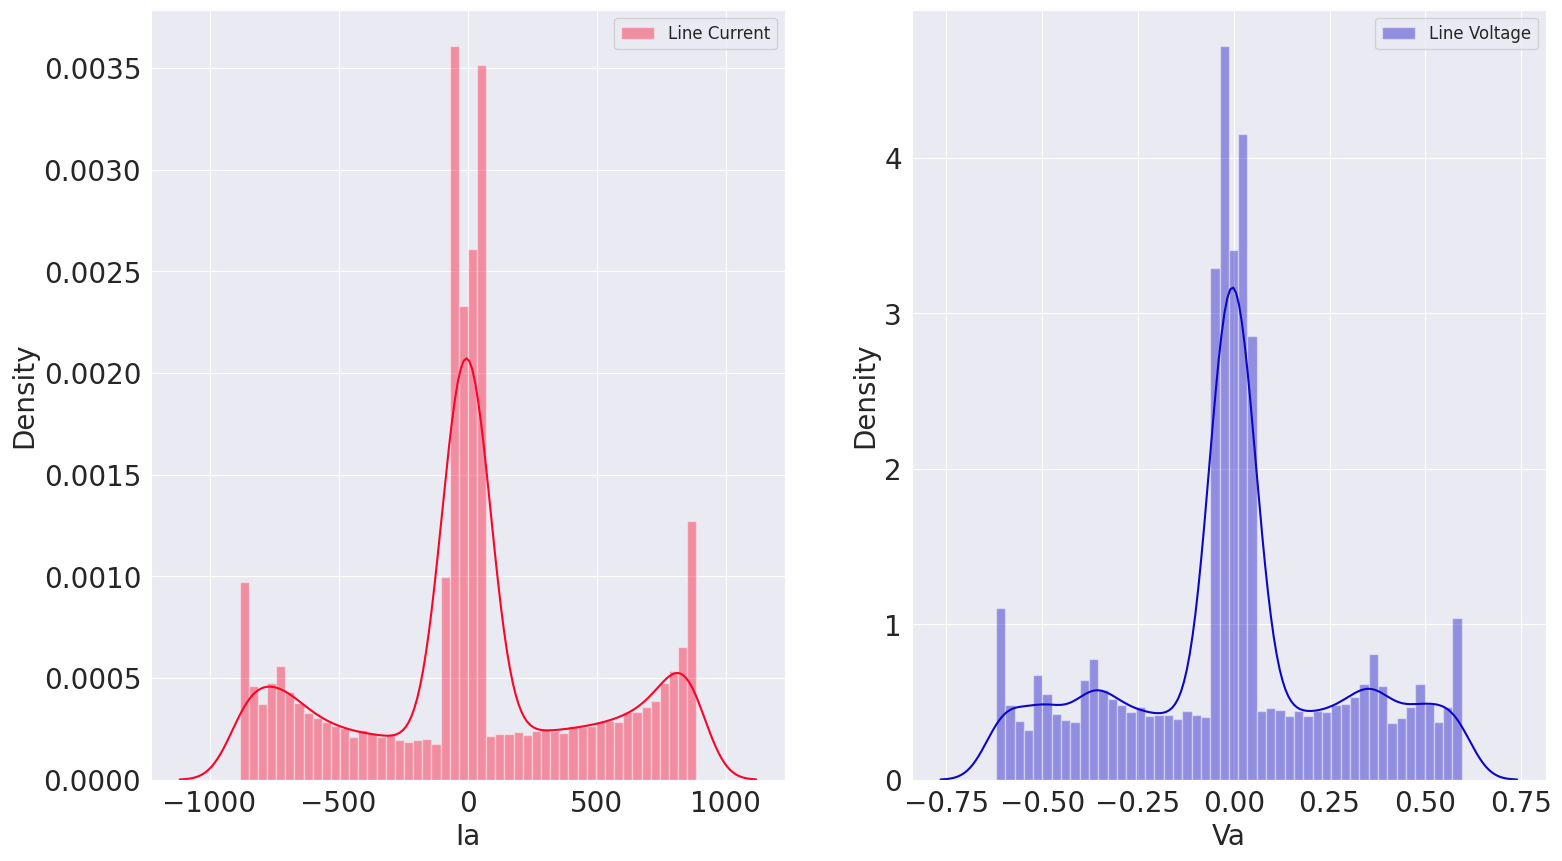

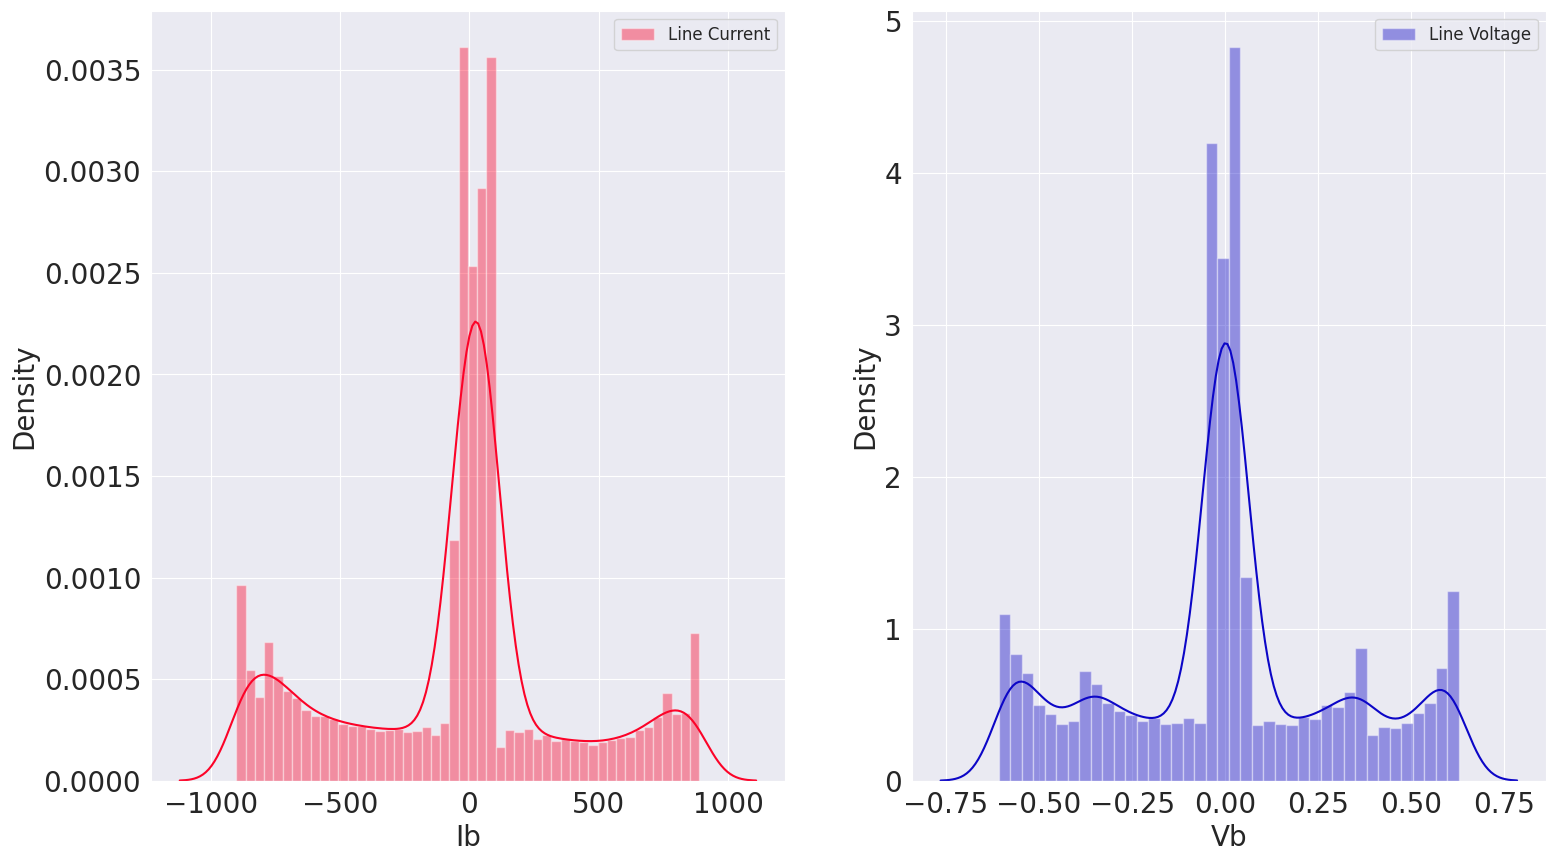

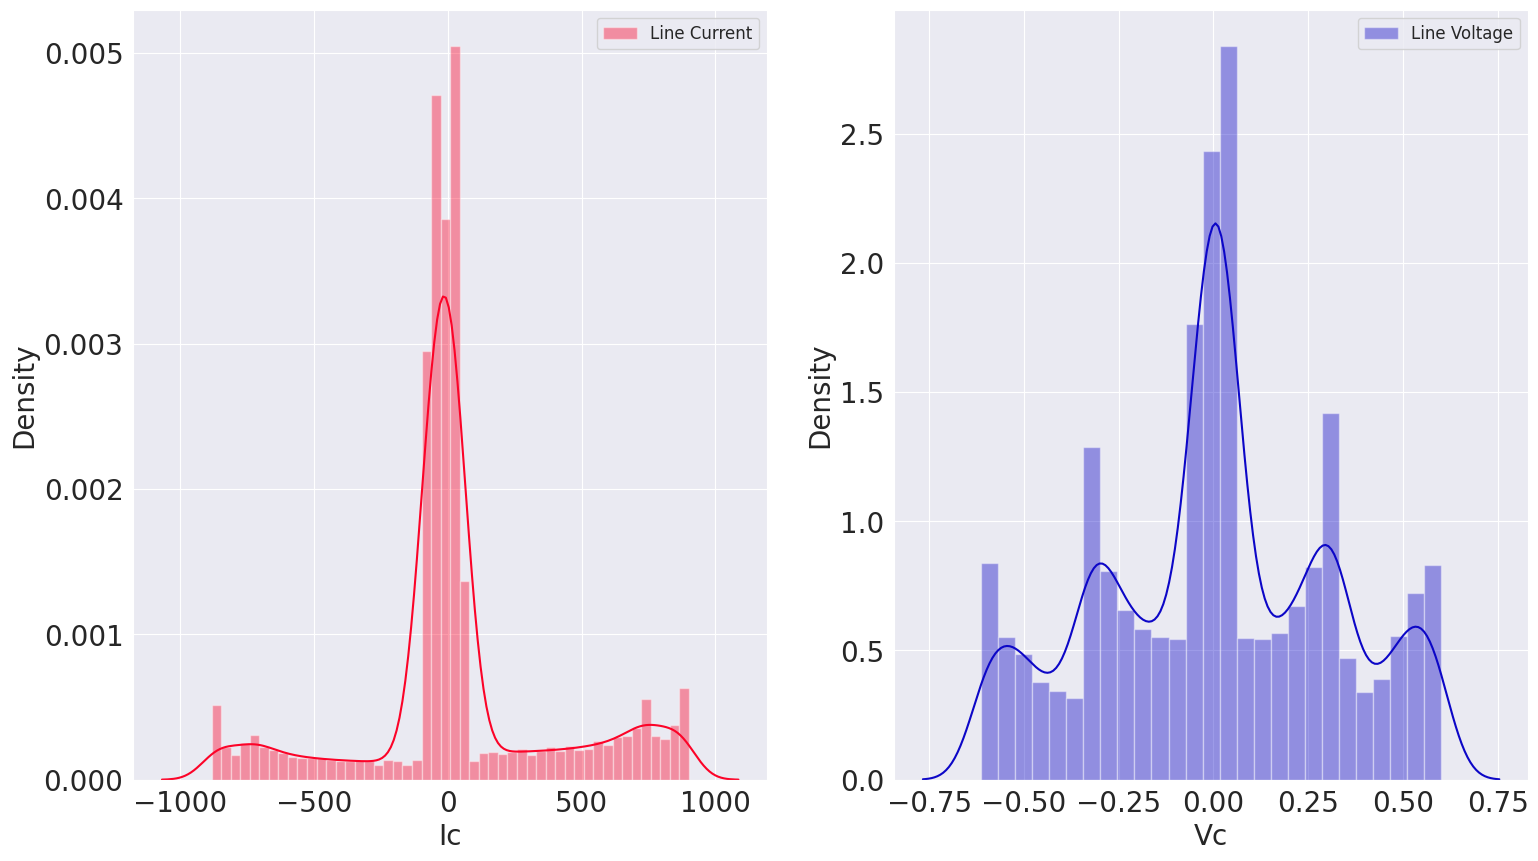

In [ ]:
lines = [
    ('Ia', 'Va'),
    ('Ib', 'Vb'),
    ('Ic', 'Vc')
]
for cola, colb in lines:
    dist(cola,colb)
    print('\n')

In [ ]:
multi_data['faultType'] = multi_data['G'].astype(str) + multi_data['C'].astype(str) + multi_data['B'].astype(str) + multi_data['A'].astype(str)
multi_data.head()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,faultType
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,1001
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,1001
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,1001
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,1001
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,1001


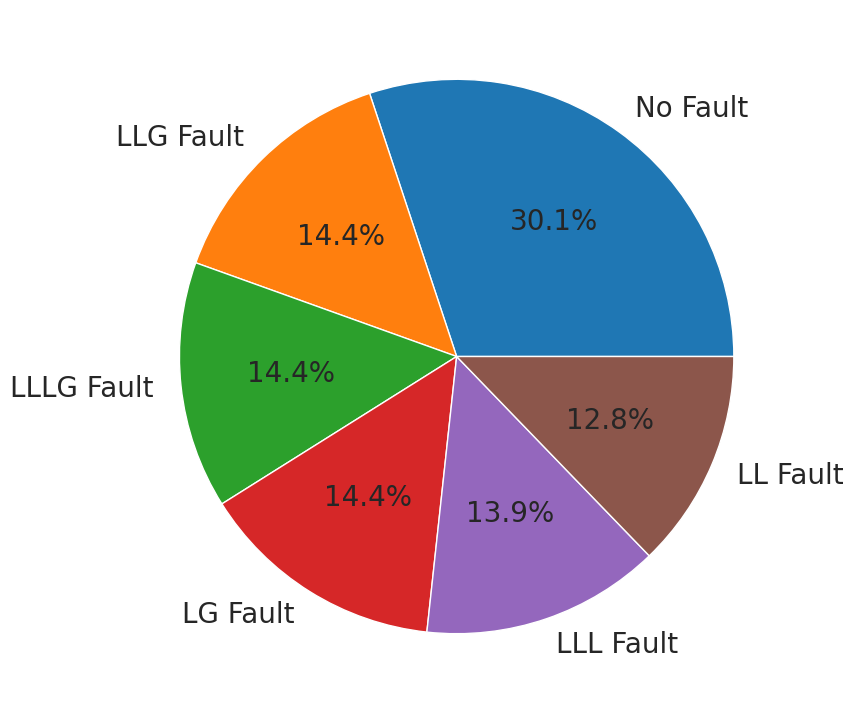

In [ ]:
plt.pie(multi_data['faultType'].value_counts(), autopct='%1.1f%%',
       labels=['No Fault', 'LLG Fault', 'LLLG Fault', 'LG Fault', 'LLL Fault', 'LL Fault'])
plt.show()

In [ ]:
X = multi_data.drop(['G','C','B','A','faultType'], axis=1)
y = multi_data['faultType']

In [ ]:
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6288, 6), (1573, 6), (6288,), (1573,))

In [ ]:
model= RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

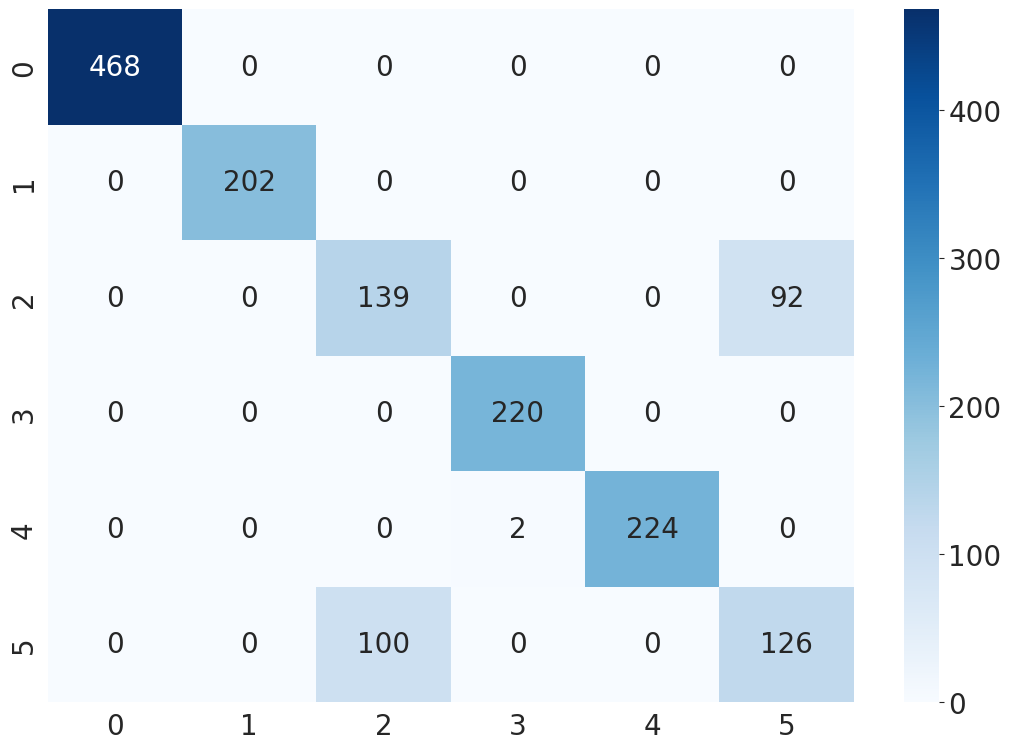

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='.4g')
plt.show()

In [ ]:
print(f'Accuracy Score: {accuracy_score(y_test, y_pred)*100:.03f}%')

Accuracy Score: 87.667%


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       468
           1       1.00      1.00      1.00       202
           2       0.58      0.60      0.59       231
           3       0.99      1.00      1.00       220
           4       1.00      0.99      1.00       226
           5       0.58      0.56      0.57       226

    accuracy                           0.88      1573
   macro avg       0.86      0.86      0.86      1573
weighted avg       0.88      0.88      0.88      1573



In [ ]:
cr = classification_report(y_test, y_pred, output_dict=True)
cr.keys()

dict_keys(['0', '1', '2', '3', '4', '5', 'accuracy', 'macro avg', 'weighted avg'])

In [ ]:
f1_scores = {}
for key, val in cr.items():
    if key == 'accuracy':
        break
    class_name = le.inverse_transform([int(key)])[0]
    f1_scores[class_name] = val["f1-score"]
sorted(f1_scores.items(), key=lambda x: x[1], reverse=True)

[('0000', 1.0),
 ('0110', 1.0),
 ('1011', 0.9955555555555555),
 ('1001', 0.995475113122172),
 ('0111', 0.5914893617021276),
 ('1111', 0.5675675675675675)]

In [ ]:
f1_scores_df = pd.DataFrame({'class': f1_scores.keys(),
                             'f1': f1_scores.values()})
f1_scores_df

,class,f1
0,0000,1.000000
1,0110,1.000000
2,0111,0.591489
3,1001,0.995475
4,1011,0.995556
5,1111,0.567568


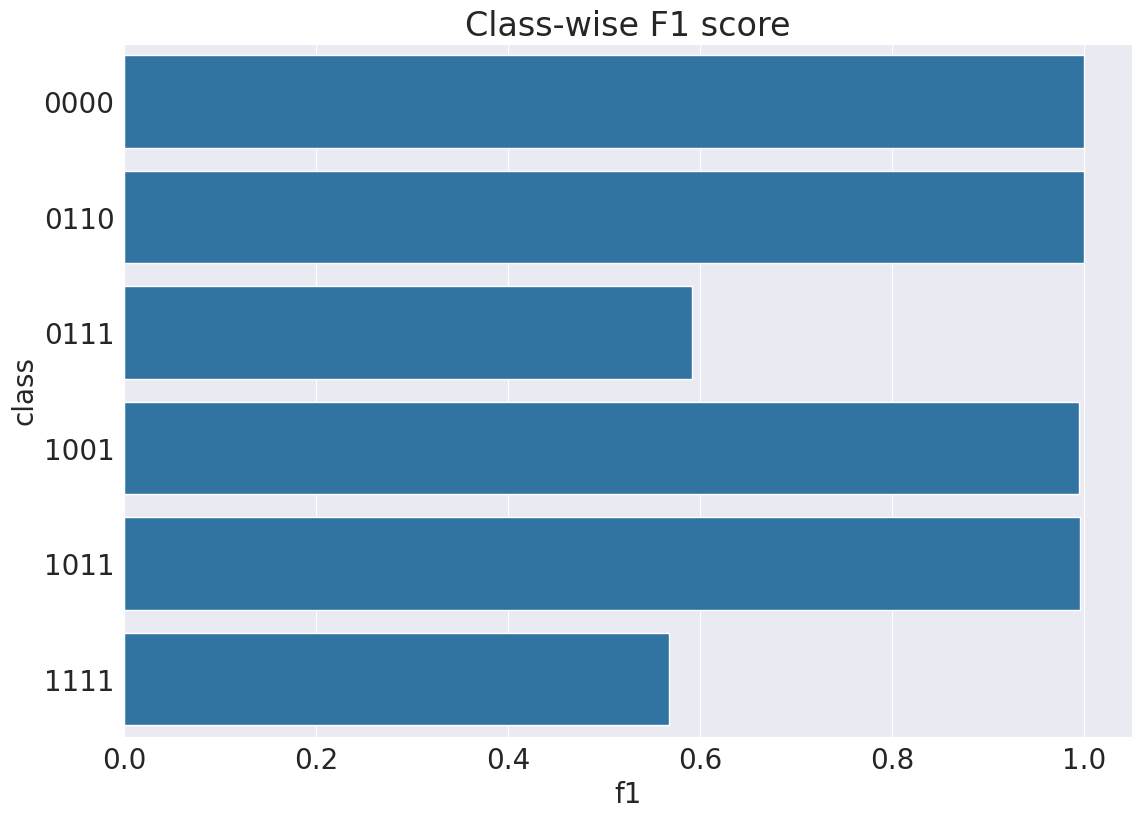

In [ ]:
sns.barplot(data=f1_scores_df, x='f1', y='class')
plt.title("Class-wise F1 score")
plt.show()